# <center>Principles of ML</center>
## <center>Assignment 2</center>
### <center>Tatiana Rosenberg (19102876) -- 1CSD1</center>
### <center>Dean Connell (21245418) -- 1CSD1</center>

# <center> Algorithm Description and Decisions Made </center>

## Algorithm Description
For this project, we chose to implement the Perceptron algorithm.

The Perceptron algorithm is one that takes a weighted sum of each attribute in a set of training observations, and passes this sum into an activation function which classifies each observation according to a threshold. This overall idea is expressed more simply diagramatically below (using the step function as the activation function):

<center>

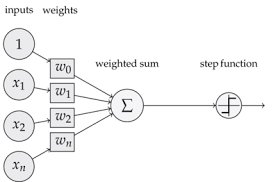

</center>

In order to ascertain the weights used for the weighted sum, stochastic gradient descent is deployed with an initial weights vector of zero. Each weight is changed only if the specific observation would be misclassified using the current weights. The stochastic gradient descent algorithm is run until either a specified maximum number of iterations is reached or until there is no change in weights for a predefined number of iterations.

### <center>Our Algorithm</center>

This is a description of our implementation of the Perceptron algorithm by exploring the ``fit`` and ``predict`` functions, in addition to the function calls they make in the ``TDPerceptron`` class. 

#### ``TDPerceptron.fit()``

Our `fit` function takes in training data and training labels. Firstly, it adds a column of dummy variables to the incoming dataset which allow for calculation of an intercept weight $w_0$. It initialises our weights to be a zero vector and then begins to iterate until either the maximum number of iterations are reached or there is no change in weights for a predefined number of iterations. For each iteration: 
- The learning rate is degenerated by $\frac{1}{t}$ where $t$ is the current number of steps taken. 
- A call is then made to the ``changeWeights`` function, which performs stochastic gradient descent to update the weights according to the following formula:
##### For current random observation $i$ and each attribute $j$:
$w_{j_{(new)}} \leftarrow w_{j_{(current)}} + \alpha (y^{(i)}-\hat{y}^{(i)})x^{(i)}_j $
(where $\hat{y}^{(i)}$ is the class predicted by our weights for observation $i$)
- The new set of weights is appended to a list, and the mean difference between the new weights and previous weights is calculated by the ``getTheta`` function.
- If this mean difference is zero, we increase a counter representing no change in weights. If this counter ever reaches $30$, or a user specified integer, we break from the loop before the maximum steps are reached.

After all iterations are complete a list of the most recent weights is returned, representing the seperation hyperplane coefficients used to distinguish class.

#### ``TDPerceptron.predict()``

Our `predict` function takes in test data and returns a list of predicted binary classifications. As in the ``fit`` method, it adds a column of dummy variables to the test dataset, to allow for the correct fitting of our separation hyperplane. The list of weights from the fitted model is stored locally in the variable ``w``. Then we iterate through all of the test observations, doing the following for each step:
- Each weight in ``w`` is multiplied by its corresponding attribute and all of these components are appended to a list.
- A call is then made to the ``activate`` function on that list, which both calculates the weighted sum of each line of data (by summing the list) and applies the chosen activation function. The activation function then returns the resulting function value and the corresponding classification threshold.
- Finally, a conditional statement is used to classify the observation, using the output of the ``activate`` function. If the value is less than the threshold, then we predict class 0, otherwise we predict class 1. This prediction is appended to a list called ``results``.

Once all observations have been classified, the list ``results`` is returned, containing the predicted classes for each observation.


## Decisions Made

### <center>Parameters</center>

For the default parameters, we have chosen:
- alpha = 0.01 : This value was inspired by the default value in our reference implementation.
- max_steps = 1000 : This value was inspired by the default value in our reference implementation.
- no_change_iter = 30 : This value was obtained after trial and error when adjusting the max_steps parameter. This value generally keeps the ``fit`` function from running for too long.    
- activation = 'sum' : The 'sum' activation function is implicitly the unit step function when given a classification threshold of zero. The unit step activation function is traditionally used in perceptron models, so it is prudent to set it as our default value.

For the 'activation' parameter, we have chosen to include the following options:
- 'sum' : as described above, is implicitly the unit step function when given a classification threshold of zero. The unit step function is traditionally used in perceptron models. This imposes a hard classification boundary on the model, which is desirable in our case.
- 'logistic' : this alternative is available as it always outputs values between 0 and 1, which is useful for modelling the probability that the class is not 0. In this case, I return a default classification threshold of 0.5. This imposes a soft classification boundary on the model and should produce results similar to those when using logistic regression. 
- 'tanh' : this alternative is similar to the 'logistic' alternative in the way that it is a sigmoidal function, however it outputs values between -1 and 1. We therefore provide a default classification threshold of 0, just as in the 'sum' function. This alternative is available as it imposes a soft classification boundary on the model, with classification threshold of 0.

### <center>Functions</center>
- `decision_function` : This function allows the user to retrieve the values used to make decisions within the `predict` function. This is helpful for plotting ROC curves.
- `predict_actual_to_csv` : This function creates a DataFrame with two columns, labels and predictions, and saves it as a csv file with the specified file name. The choice of using CSV files comes from its ease to import, export, and utilize in Python.
- `summary`: This function provides information on the TDPerceptron model it is called on. It contains information such as the separating hyperplane, model hyperparameters, and accuracy metrics on the training data. We included this function so that we could easily view relevant information about our current model fit.

### <center>Metrics</center>

To compare the two models, we have chosen to utilize four different metrics: 
Accuracy, MCC, F1, and AUC. We have included accuracy as it is a primitive measure of fit. While accuracy doesn't account for imbalanced class distribution, the MCC score does, so we have decided to utilize this metric. The F1 score is the harmonic mean of precision and recall, and it is a good alternative to accuracy for an imbalanced class distribution within a dataset. The AUC score is useful for numerically comparing ROC curves, which focuses on true positive and true negative frequencies.



# <center> Tests and Results </center>

Our implementation of the perceptron, TDPerceptron, does comparatively well in relation to the SKLearn Prceptron. To show the comparison, we've utilized four different scoring metrics: accuracy, Matthew's Correlation Coefficient (MCC), F1, and Area Under the (ROC) Curve (AUC).

## Area Under the Curve (AUC) Scores
### <center> SKLearn vs. TDPerceptron (Sum) </center>
Our first test consisted of ten iterations in which the train and test data was shuffled randomly with every iteration. Our train, test split was set to 66% train and 33% test. The two models had parameters set to: Maximum Iterations = 25000, N Iterations With No Change = 30, and Learning Rate (alpha) = 0.01.

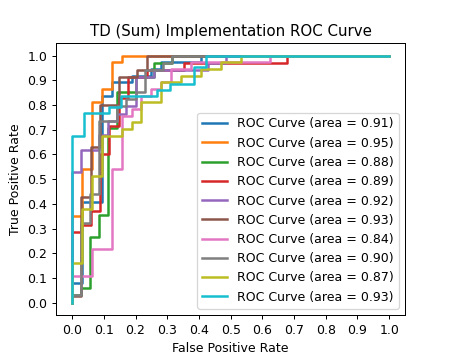
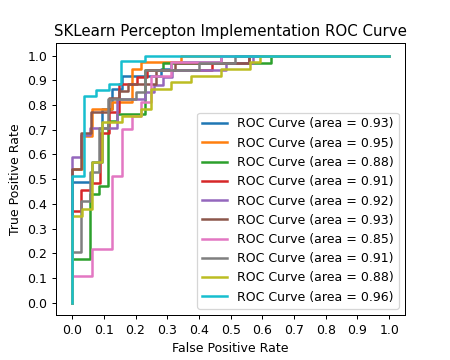
<center>

 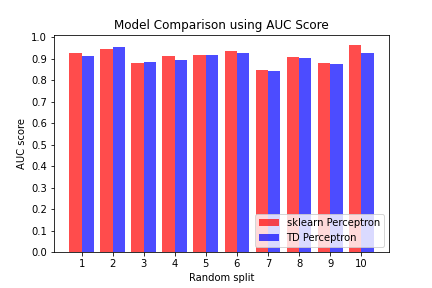
 </center>

 The average AUC score for our implementation was 0.902, and the average AUC score for the SKLearn Perceptron was 0.912. With respect to the AUC score, the SKLearn Perceptron outperforms our implementations by just 0.01.

 Our implementation, with the activation function set to 'logistic' and 'tanh', also did comparatively well to the SKLearn Perceptron during the same 10 iterations.

 ### <center>SKLearn vs. TDPerceptron (logistic and tanh)</center>

 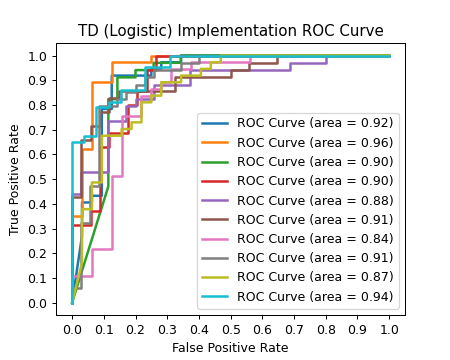
 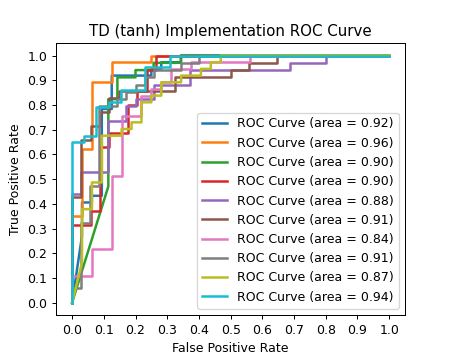

 Our implemetation using the 'logistic' activation function recieved a mean AUC score of 0.903, and  our implemetation using the 'tanh' activation function recieved a mean AUC score of 0.903. Each of these with an AUC score of 0.009 less than the SKLearn Perceptron model.

 ## Classification success metrics: Accuracy, MCC and F1 scores

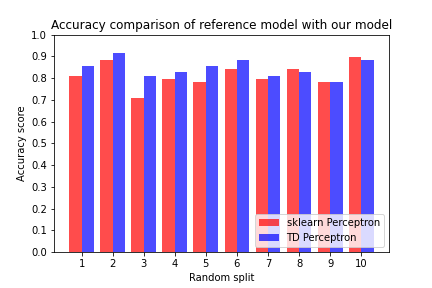
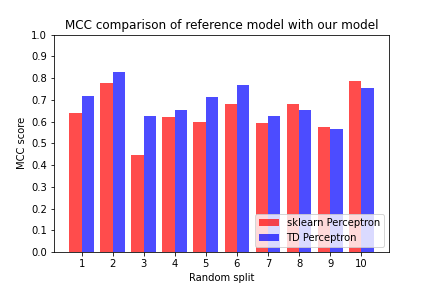

<center>

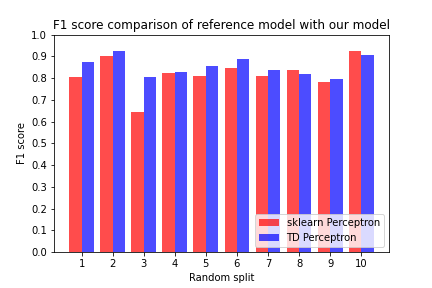

</center>




When comparing the reference implementation to our own, we can see that both models are quite competitive over all accuracy scores. The ``TDPerceptron`` performs just as well as or outperforms the sklearn implementation in most cases, in all three of our metrics. 

It is important to note that both models were run with similar hyperparameters e.g. maximum iterations of 1000 steps and a learning rate of 0.01.

Below, I have summarised the mean accuracy scores for each implementation over 10 iterations:

#### _Mean scores for each implementation over 10 iterations_

|          	| sklearn Perceptron 	| TD Perceptron      	|
|----------	|--------------------	|--------------------	|
| Accuracy| 0.8144927536231885 	| 0.8478260869565217 	|
| MCC Score| 0.639222496610804  	| 0.6990936364056786 	|
| F1 Score| 0.8181341621986862 	| 0.8573213865349774 	|

<br>

As you can see, the ``TDPerceptron`` has a significantly higher mean score using all three metrics. 

This could be considered a fantastic result. However, we have not tested the complexity of our algorithm in relation to the reference implementation, so the complexity of the TDPerceptron could be a trade-off for slightly better results.

# Conclusions and Observations

## Observations
### <center>Performance</center>

The performance of our TDPerceptron compared to the SKLearn Perceptron depends on the data within the train and test sets. 

During the ten iteration comparison, our model had much better AUC scores than the SKLearn Perceptron on occasion, and our model had much worse AUC scores on occasion. 

The performance of our TDPerceptron also depends on the metric used to compare the performance. The variance in performance between the two implementations is much smaller when comparing the AUC scores, whereas the variance in performance is greater when comparing the MCC or F1 scores.

However, considering the accuracy metrics that we have chosen, our perceptron implementation outperforms the SKLearn perceptron most of the time. Over the ten iterations, we have seen that the TDPerceptron has higher mean accuracy, MCC and F1 scores than the SKLearn counterpart. 

With this information, we can conclude that our perceptron algorithm performs reasonably well.


## Conclusions

In conclusion, we believe that the TDPerceptron has a performance that is competitive with the reference implemenetation from the SKLearn package in Python. When compared with identical hyperparameters, the TDPerceptron admits generally higher classification metric scores, with mean classification scores overshadowing the scores for the SKLearn perceptron on the same data. One limitation of this project is the lack of extensive testing as to regards of algorithm complexity. However, in our personal experience of working with our TDPerceptron, there isn't a noticable time difference in the execution of our implementation with the reference implementation.

Overall, this project has brought us intense satisfaction. From researching the perceptron algorithm to gradually learning more and more useful concepts and algorithms from the lecture material, this project has afforded both of us an extensive knowledge on the inner workings of this particular classification model. We agree that it has improved our programming ability and our understanding of the machine learning pipeline. This project has introduced us to many challenges and concepts that we may not have encountered otherwise. We have put in extensive effort for our model to work efficiently and well. We are thrilled that our model is comparable with an implementation used widely in many contexts.

# Responsibility Distribution

### Shared Responsibilites
  While different tasks were delegated and tackled separately, Dean and Tatiana spent the majority of time working on this project together in the IT305 room. This has led to a major collaboritve effort, especially with regards to planning, debugging, and revising. Many of the functions for this project recieved input from both parties to reach a fully functioning model.
  The credit for the tasks below are given to one person or another, but we would like to reiterate that there was a major collaborative effort.

  ## Dean:
  I was involved in the following parts of our code:
  - Writing the activation kwargs and default values in the `__init__` function.
  - Writing the `activate` function, which allows the user to choose the activation function.
  - Writing the `changeWeights` function, which basically implements stochastic gradient descent.
  - Implementing the dummy variable in the `fit` and `predict` functions.
  - Writing the `summary` function, which provides information on the fit such as the separating hyperplane, model hyperparameters and accuracy metrics on the training data.
  - Writing the `make_chart` function, which plots bars representing accuracy to compare the reference implementation to ours.
  - Writing the `train_test_split` function according to the assignment specification.
  - Adapting one of Tatiana's functions `MCC_score` to generate the `f1_score` function.
  - Writing the code to generate the accuracy comparison plots of the reference implementation with ours. Plots were generated comparing the two implementations on accuracy, MCC and F1 score. 

I was involved in writing the following parts of the report:
- Describing the perceptron algorithm in general.
- Describing our implementation of the perceptron algorithm by exploring the `fit` and `predict` functions.
- Helped write the "Decisions Made" section, justifying our choice of activation function options for our model, and explaining the choice to implement a ``TDPerceptron.summary`` function.
- Compared the accuracy, MCC and F1 scores between the reference implementation and our own implementation, and discussed our findings.
- Collaborated with Tatiana on writing the observation section and the conclusion of the report.


  ## Tatiana:
  I was involved in the following portions of the project:

  - Initializing parameters within the __init__ function for our TDPerceptron constructor
  - Training the TDPerceptron within the fit(...) function which would update the wights of the model until it reached the maximum number of steps or had a zero change in weights for 30 iterations
  - Predicting the outcomes of a test set withing the predict(...) function which would utilize the activate(...) function to obtain the decision value and the treshold value and predict 0 or 1 depending on these values
  - Creating a csv file which contrains the true values (y_test) and the predictions for a given test set (X_test)
  - Obtaining the values used within the predict(...) function to make a decision by writing the decision_function(...)
  - Providing a function, __getTheta(...), which returns the change in weights between the current set of weights and the previous set of weights
  - Providing a function, ROC_plots, which allows multiple lines to be added to a ROC Curve figure
  - Providing different methods to  measure the performance of the two models
  - Importing, cleaning, and selecting the wildfires.txt for use in the performance comparison

I was involved in the following parts of the report:
  - Writing the 'Functions' and 'Metrics' portion of the 'Decisions Made' section of the report
  - Writing the introduction and the 'AUC scores' portion of the 'Tests and Result's portion of the report
  - Writing the 'Performance' section of the 'Conclusions and Observations' portion of the report
  - Collaborting with Dean on the 'Decisions Made', 'Conclusions and Observations', and 'Responsibility Distribution' portions of the report
  - Proofreading, editing, and submitting the report



# Appendix



### Code developed for this project

In [ ]:
import numpy as np
import random
import math
from random import randint
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn import preprocessing
import matplotlib.pyplot as plt
import csv

class TDPerceptron:
    
    def __init__(self, **kwargs): # T: Initializing paramteres of the model
        if (kwargs.get('alpha') != None): # T: the learning rate
            self.alpha = kwargs.get('alpha') # T:
        else: # T:
            self.alpha = 0.01 # T: Default learning rate
        
        if (kwargs.get('max_steps') != None): # T:
            self.max_steps = kwargs.get('max_steps') # T:
        else: # T:
            self.max_steps = 1000 # T: Default maximum number of steps

        if (kwargs.get('no_change_iter') != None): #D
            self.no_change_iter = kwargs.get('no_change_iter') #D
        else: #D
            self.no_change_iter = 30 # T: Default maximum number of consecutive iterations with no change

        if (kwargs.get('activation') != None): #D
            self.activation = kwargs.get('activation') #D
        else: #D
            self.activation = 'sum' #D: Default activation function - represents unit step function

        
        self.weights = [] # T: Initialiazing empty weight list

    # activation function
    def activate(self, x): #D
        '''
        Input: a vector x, which represents the the coeffiecient-variable pairs as follows: [w0, w1*x1, w2*x2, ..., wn*xn]
        Returns: f(x), f a function on the vector x which can be used to classify if [x1,x2,...,xn] is classed as 0 or 1 and associated classification threshold
        '''
        if(self.activation=='sum'): #D
          return sum(x), 0 #D: step function value and threshold 0 returned
        elif(self.activation=='logistic'): #D
          return round(1/(1+math.e**(-sum(x))), 15), 0.5 #D: logistic function value and threshold 0.5 returned
        elif(self.activation=='tanh'): #D
          return round((math.e**(sum(x))-math.e**(-sum(x)))/(math.e**(sum(x))+math.e**(-sum(x))), 15), 0 #D: tanh function value and threshold 0 returned
        else: #D
          return sum(x), 0 #D: catch-all case is step function
 
    def __changeWeights(self, w, alpha): #D 
        '''
        Inputs: w, a vector of weights and alpha, the learning rate
        Calculates a new vector of weights using one iteration of stochastic gradient descent
        Returns: updated vector of weights
        '''
        # calculating the actual output given the current weights
        prediction = 0 #D
        components = [] #D
        row = random.randint(0, len(X_train)-1) #D: choosing a random observation
        for att in range(len(w)): #D
            component = w[att]*float(X_train.iloc[row,att]) #D: w_i*x_i for x_i in chosen row
            components.append(component) #D: add this value to a list representing each function component
        total, threshold = self.activate(components) #D: calculates function value and returns value and threshold
        if total>threshold: #D
            prediction = 1 #D
        else: #D
            prediction = 0 #D
        # calculating the new weights
        new_weights = [] #D
        for att in range(len(w)): #D
            delta = alpha*(y_train[row]-prediction)*float(X_train.iloc[row,att]) #D: calculating the change in each weight
            new_weights.append(w[att]+delta) #D: changing the weights and appending to new weights vector
        return new_weights #D


    def fit(self, data, label):
        '''
        Inputs: Function takes in training data (a dataframe) and training labels (a list)
        
        Builds a perceptron model using a stochastic gradient decent to adjust the weights and saves the best
        weights to the self.weights field.
        '''
        train_x = X_train # T
        if "dummy" not in train_x: #D: checking if the dummy variable column already exists (to avoid adding more by running code twice)
            train_x.insert(loc=0, column="dummy", value=np.ones(len(train_x))) #D: inserting dummy variable column on the left of training set
        
        feature_len = len(train_x.columns) # T:
        self.weights = np.zeros(feature_len) # T: Initializing weights to be 0
        step_count = 0 # T:

        all_weights = [self.weights] # T:
        weight_theta =  1 # T:
        list_theta = [] # T
        alpha0 = self.alpha # T

        j = 0 # T: Using j to track conscutive [change in weights = 0]
        for i in range(1, self.max_steps+1): # T:
            alpha = alpha0/i # T: Updating the learning rate with each iteration
            all_weights.append(self.__changeWeights(all_weights[-1], alpha)) # T: Adding the new weights to a list of wegiht lists 
            weight_theta = self.__getTheta(all_weights[-2], all_weights[-1]) # T: Change inw eights
            
            if(weight_theta != 0): #D
                j = 0 #D: resetting counter when we encounter a non-zero weight_theta value i.e. when weights change
            else:
                j += 1 #D: incrementing counter as there is no change in weights
            if(j == self.no_change_iter): #D
              break #D: breaking out of for loop if our count hits the no_change_iter limit
        self.weights = all_weights[-1] # T: self.weights is assigned the last weight calculaion

    def predict(self, X_test):
      '''
      Inputs: data (dataframe) of the same variables as the training data in the fit function.
      Returns a list of binary predictions for the given dataset.
      '''
      test_x = X_test # T: To not change the given data
      if "dummy" not in test_x: #D: checking if the dummy variable column already exists (to avoid adding more by running code twice)
          test_x.insert(loc=0, column="dummy", value=np.ones(len(X_test))) #D: inserting dummy variable column on the left of test set

      w = self.weights # T
      v = [] # T: Holds weights multiplied by feature 
      list_of_lists = [] # T: List of all v
      results = [] # T: list of predictions

      for i in range(len(test_x)): # T
          v = [] #D
          for j in range(len(test_x.columns)): # T
              v.append(float(w[j]) * float(test_x.iloc[i, j])) # T: w x X
          list_of_lists.append(v) #D: appending list of our components w_j*x_j to a list
          x, y = self.activate(list_of_lists[i]) # T: call activate() on list of w x X for a row of data
          
          # Predictions based on the threshold
          if (x < y): # T: if value of x is less than the threshold
              results.append(0) # T
          else: # T: if value of x is greater than or equal to the threshold
              results.append(1) # T
      return results # T

    def predict_actual_to_csv(self, X_test, y_test, file_name):
      '''
      Inputs: X_test (dataframe) of the same variables as the training data in the fit function.
      y_test, a list of labels for the X_test set
      file_name (a string) in which to save the predictions, a list of binary predictions for 
      the given dataset, 
      Saves Actual values and Predictions to a csv file
      '''
      test_x = X_test # T: To not change the given data
      if "dummy" not in test_x: #D: checking if the dummy variable column already exists (to avoid adding more by running code twice)
          test_x.insert(loc=0, column="dummy", value=np.ones(len(X_test))) #D: inserting dummy variable column on the left of test set

      w = self.weights # T
      v = [] # T: Holds weights multiplied by feature 
      list_of_lists = [] # T: List of all v
      results = [] # T: list of predictions

      for i in range(len(test_x)): # T
          v = [] # D
          for j in range(len(test_x.columns)): # T
              v.append(float(w[j]) * float(test_x.iloc[i, j])) # T: w x X
          list_of_lists.append(v) #D: appending list of our components w_j*x_j to a list
          x, y = self.activate(list_of_lists[i]) # T: call activate() on list of w x X for a row of data
          
          # Predictions based on the threshold
          if (x < y): # T: if value of x is less than the threshold
              results.append(0) # T
          else: # T: if value of x is greater than or equal to the threshold
              results.append(1) # T
      data = {'Actual': y_test,     # T: Pairing column names with data
              'Predictions': results}
      result_df = pd.DataFrame(data) # T: Creating a dataframe from dictionary
      result_df.to_csv((file_name + '.csv')) # T: Crwating a csv with the dataframe

      
    def decision_function(self, X_test): # T
        '''
        Input: X_test data
        Output: returns the values given by the activate(...) function 
        (which are then used in combination with a threshold to decide 
        a prediction)
        '''
        test_x = X_test # T: To not change the given data
        if "dummy" not in test_x: #D: checking if the dummy variable column already exists (to avoid adding more by running code twice)
          test_x.insert(loc=0, column="dummy", value=np.ones(len(X_test))) #D: inserting dummy variable column on the left of test set


        w = self.weights # T
        v = [] # T: Holds weights multiplied by feature 
        list_of_lists = [] # T: List of all v
        results = [] # T: list of predictions

        for i in range(len(test_x)): # T
            v = [] # D
            for j in range(len(test_x.columns)): # T
                v.append(float(w[j]) * float(test_x.iloc[i, j])) # T
            list_of_lists.append(v) #D: appending list of our components w_j*x_j to a list
            x, y = self.activate(list_of_lists[i]) # T
            results.append(x) # T
        return results # T

    def __getTheta(self, w0, w1): # T:
        '''
        Inputs: w0, a vector of weights and w1, a new vector of weights
        Returns the average difference of weights
        '''
        return abs(np.mean((np.subtract(w0, w1)))) # T:

    def summary(self): #D
        '''
        Output: printed strings providing a summary of our model
        '''
        print("Summary:") #D
        print("Separating hyperplane:") #D
        print("\t", self.weights[0], end='') #D: printing the intercept coefficient first
        for i in range(1,len(self.weights)): #D
          if(self.weights[i]>=0): #D
            print(" + "+str(self.weights[i])+"*"+str(X_train.columns[i]), end='') #D: if positive return + w_i*x_i
          else: #D
            print(" - "+str(abs(self.weights[i]))+"*"+str(X_train.columns[i]), end='') #D if negative return - |w_i|*x_i
        print("\n\nActivation function used:") #D
        print("\t",(self.activation).capitalize()) #D: print a capitalised name of the perceptron activation function
        print("\nAccuracy metrics on training data:") #D: prints name of metric followed by score on training set
        print("\t Accuracy:\t\t", accuracy_score(self.predict(X_train), y_train)) #D
        print("\t MCC Score:\t\t", MCC_score(self.predict(X_train), y_train)) #D
        print("\t F1 Score:\t\t", f1_score(self.predict(X_train), y_train)) #D
        print("\t AUC Score:\t\t", AUC_score(self.predict(X_train), y_train)) #D - NOTE: this AUC_score function is imported from sklearn
        print("\nModel hyperparameters:") #D: prints values of the perceptron hyperparameters
        print("\t Initial learning rate:\t\t\t", self.alpha) #D
        print("\t Learning degeneration factor:\t\t 1/t") #D
        print("\t Maximum number of steps:\t\t", self.max_steps) #D
        print("\t Maximum no change iterations:\t\t", self.no_change_iter) #D


In [ ]:
def make_chart(title, score_name, reference_acc, our_acc, i): #D
    '''
    Input: title: a string containing the graph title, score_name: a string with the name of accuracy score used y-axis label,
    reference_acc: accuracy score for reference implementation, our_acc: accuracy score for our implementation, i: current iteration (i.e. current random split).
    
    This adds bars to our accuracy graph for the current iteration i, representing the accuracy scores for the reference implementation and our implementation.
    This also adds a legend, ticks, labels and titles to the graph and specifies the figure.
    '''
    i = i + 1 # T
    plt.figure(title) #D
    plt.bar(i-0.2, reference_acc, 0.4, color="red", alpha=0.7) #D: plots bar to left of tick
    plt.bar(i+0.2, our_acc, 0.4, color="blue", alpha=0.7) #D: plots bar to right of tick
    plt.xticks(np.arange(1,11)) #D: labels x-axis ticks
    plt.yticks(np.arange(0,11)*(0.1)) # T: labels y-axis ticks
    plt.legend(["sklearn Perceptron", "TD Perceptron"], loc='lower right') #D
    plt.title(title) #D
    plt.xlabel("Random split") #D
    plt.ylabel(score_name) #D
    return plt # T

def ROC_plots(X, y_test, y_preds, title, my_plt): # T
    '''
    Input: all feautures of the data, labels from test set, predictions for the test set
    using MLModel.decision_function(), title for the graph, and optional plt object
    
    Returns a plt object of the ROC graph of the model
    '''
    # T: Creating the roc_curve and calculating the AUC of the roc_curve
    fpr = dict() # T
    tpr = dict() # T
    roc_auc = dict() # T

    fpr, tpr, _ = roc_curve(y_test, y_preds, pos_label=1) # T
    roc_auc = auc(fpr, tpr) # T
    
    # T: Creating/Adding to a plt.figure to crete a graph with multiple lines 
    plt.figure(my_plt, figsize=(5,4), dpi= 90) # T
    plt.plot( # T
        fpr, # T
        tpr, # T
        lw=2, # T
        label = "ROC Curve (area = %0.2f)" %roc_auc # T
    )
    plt.xlabel("False Positive Rate") # T
    plt.ylabel("True Positive Rate") # T
    plt.legend(loc="lower right") # T
    plt.xticks(np.arange(0,11)*(0.1)) # T
    plt.yticks(np.arange(0,11)*(0.1)) # T
    plt.title(title) # T
    return plt # T

def train_test_split(X, y, split, **kwargs): #D
    '''
    Input: data, feautres and labels (with labels being the first column in dataset), and split, the percentage of data in the train set
    Returns four datafrmes: X_train, y_train, X_test, y_test
    '''
    all_data = pd.concat([y,X], axis=1) #D: attaching labels to relevant observations to prevent mix-up
    if (kwargs.get('random_state') != None): #D
      rand_state = kwargs.get('random_state') #D: get random_state argument if specified
    else: #D
      rand_state = 0 #D: default random state is 0
    data = all_data.sample(frac=1, random_state=rand_state) #D: shuffling dataset and storing in data variable
    train_data = data.iloc[:round(split*len(data))] #D: getting split proportion of data for training set
    test_data = data.iloc[round(split*len(data)):] #D: getting other 1-split proportion of data for test set
    #D: getting y_train and y_test (response variables) as np arrays from respective datasets (all stored in first column of respective datasets)
    #D: getting X_train and X_test (predictor variables) as pd DataFrames from respective datasets
    y_train, X_train = np.asarray([index[0] for index in train_data.values]), pd.DataFrame([index[1:] for index in train_data.values], columns=train_data.columns[1:]) #D
    y_test, X_test = np.asarray([index[0] for index in test_data.values]), pd.DataFrame([index[1:] for index in test_data.values], columns=test_data.columns[1:]) #D
    return X_train, y_train, X_test, y_test #D: returning train and test sets and labels

def accuracy_score(preds, y_test): # T
    '''
    Input:
    y_test, labels for the test set
    preds, model predcitions for the X_test data
    Output:
    Total predictions correct / number of all predictions
    '''
    assert len(y_test) == len(preds) # T
    score = 0 # T
    # Counting total number of correct predictions
    for i in range(len(preds)): # T
      if (preds[i] == float(y_test[i])): # T
        score = score + 1 # T
    # Return percentage of correct predictions within 
    # total predictions
    return score / len(y_test) # T

def MCC_score(preds, y_test): # T
    '''
    Inputs: 
    y_test, labels for the test set
    preds, model predcitions for the X_test data
    Output:
    Matthew's Correlation Coefficient score in the range [-1, 1]
    '''
    assert len(y_test) == len(preds) # T

    score = 0.0 # T
  
    TP = 0 # True Positives # T
    TN = 0 # True Negatives # T
    FP = 0 # False Positives # T
    FN = 0 # False Negatives # T
    # Calculating all of the above values
    for label, prediction in zip(y_test, preds): # T
        if (label == 0): # T
            if (prediction == 0): # T
                TN += 1 # T
            else: # T
                FP += 1 # T
        elif(label == 1): # T
            if (prediction == 1): # T
                TP += 1 # T
            else: # T
                FN += 1 # T
    # Calculating the numerator and denominator
    MCC_numerator = (TP * TN) - (FP * FN) # T
    MCC_denominator = math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)) # T
    if (MCC_denominator == 0): # T
        MCC_denominator = 1 # Prevent division by 0 # T
    score = MCC_numerator / MCC_denominator # T
    return score # T

def f1_score(preds, y_test): #D
    '''
    Inputs: 
    y_test, labels for the test set
    preds, model predcitions for the X_test data
    Output:
    F1 score for the model: TP/(TP+0.5*(FP+FN))
    '''
    assert len(y_test)==len(preds) # T 
    TP = 0 # True Positives # T
    TN = 0 # True Negatives # T
    FP = 0 # False Positives # T
    FN = 0 # False Negatives # T
    # Calculating the above values
    for label, prediction in zip(y_test, preds): # T
        if (label == 0): # T
            if (prediction == 0): # T
                TN += 1 # T
            else: # T
                FP += 1 # T
        elif(label == 1): # T
            if (prediction == 1): # T
                TP += 1 # T
            else: # T
                FN += 1 # T
    return TP/(TP+0.5*(FP+FN)) #D: calculating the F1 score using quantities calculated and returning this value

def AUC_score(y_preds, y_test): # T
    '''
    Inputs: 
    y_test, labels for the test set
    preds, model predcitions for the X_test data
    Output:
    Area Under the ROC Curve score in the range [0, 1]
    '''
    fpr = dict() # T
    tpr = dict() # T
    roc_auc = dict() # T
    fpr, tpr, _ = roc_curve(y_test, y_preds, pos_label=1) # T
    # Calculating the area under the curve for the roc_curve
    roc_auc = auc(fpr, tpr) # T
    return roc_auc # T


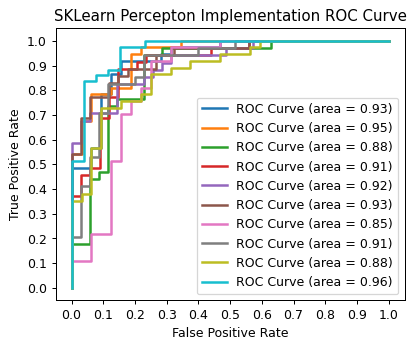

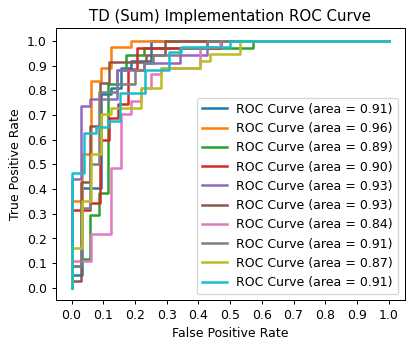

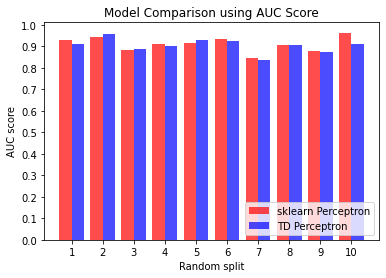

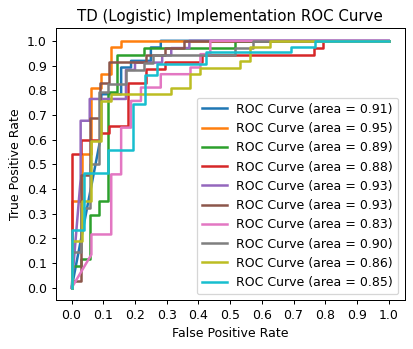

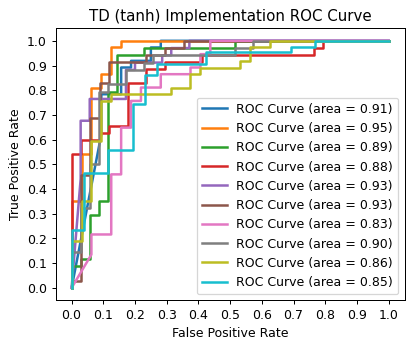

In [ ]:
# Getting data from the wildfires.txt file
colNames = ["fire", "year", "temp", "humidity", "rainfall", "drought_code", "buildup_index", "day", "month", "wind_speed"] # T:
fireData = pd.read_csv("wildfires.txt", sep="\t", names=colNames) # T:
fireData = fireData.iloc[1:] # T: Removing the extra set of labels
# Transforming the data into proper formats
fireData["fire"] = [x.strip() for x in fireData["fire"]] # T: strip white space
le = preprocessing.LabelEncoder() # T:
fireData["fire"]= le.fit_transform(fireData["fire"]) # T: makes y/n into 0's and 1's

# Feature selection -> day, month, year don't indicate whether there will be a fire
X = fireData[["temp", "humidity", "rainfall", "drought_code", "buildup_index", "wind_speed"]] # T:
y = fireData["fire"] # T:

# 10 implementations of the reference model (sklearn) and 10 implementations of our model
for i in range(10): # T
    # New random split of data
    X_train, y_train, X_test, y_test = train_test_split(X, y, 0.66, random_state=i) # T:

    # sklearn implementation
    prcpt = Perceptron(max_iter = 25000, n_iter_no_change = 30, alpha = 0.01) # T:
    prcpt.fit(X_train, y_train) # T:
    y_preds = prcpt.decision_function(X_test) # T:
    # ROC plot
    ref_plt = ROC_plots(X, y_test, y_preds, "SKLearn Percepton Implementation ROC Curve", "ref_plt") # T
    ref_plt.savefig("SKLearn Percepton") # T

    # Our implementation using sum activation function
    TDprcpt_sum = TDPerceptron(activation='sum', max_steps=25000) # T:
    TDprcpt_sum.fit(X_train, y_train) # T:
    TD_preds = TDprcpt_sum.predict(X_test) # T:
    TD_y_preds = TDprcpt_sum.decision_function(X_test) # T:
    # ROC plot
    TD_plt1 = ROC_plots(X, y_test, TD_y_preds, "TD (Sum) Implementation ROC Curve", "TD_plt_sum") # T
    TD_plt1.savefig("TDPercepton Sum") # T


    # Our implementation using logistic activation function
    TDprcpt_log = TDPerceptron(activation='logistic', max_steps=25000) # T:
    TDprcpt_log.fit(X_train, y_train) # T:
    TD_y_preds_log = TDprcpt_log.decision_function(X_test) # T:

    # Bar chat comparing the AUC scores for the reference implementation and our sum implementation
    x = make_chart("Model Comparison using AUC Score", "AUC score", AUC_score(y_preds, y_test), AUC_score(TD_y_preds, y_test), i) # T
    x.savefig("ModelComparison") # T
    # ROC plot
    TD_plt2 = ROC_plots(X, y_test, TD_y_preds_log, "TD (Logistic) Implementation ROC Curve", "TD_plt_log") # T
    TD_plt2.savefig("TDPercepton Log") # T


    # Our implementation using tanh activation function
    TDprcpt_tanh = TDPerceptron(activation='tanh', max_steps=25000) # T:
    TDprcpt_tanh.fit(X_train, y_train) # T:
    TD_y_preds_tanh = TDprcpt_tanh.decision_function(X_test) # T:
    # ROC plot
    TD_plt3 = ROC_plots(X, y_test, TD_y_preds_log, "TD (tanh) Implementation ROC Curve", "TD_plt_tanh") # T
    TD_plt3.savefig("TDPercepton Tanh") # T


0.8144927536231885 0.639222496610804 0.8181341621986862
0.8333333333333334 0.6688817081326224 0.8381734531206856


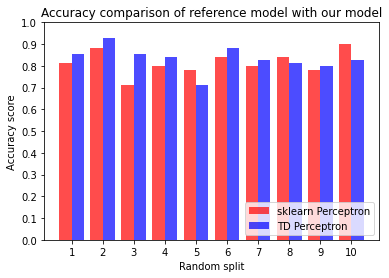

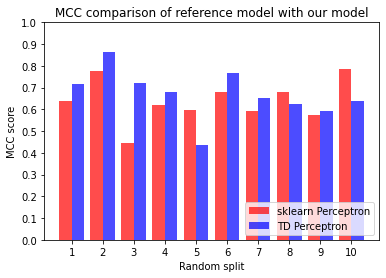

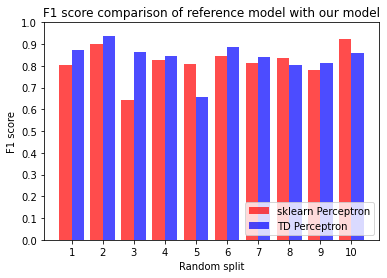

In [ ]:
prcpt_accs, prcpt_mccs, prcpt_f1s = [],[],[] #D
TD_accs, TD_mccs, TD_f1s = [],[],[] #D
for i in range(10): #D
    # getting both model predictions
    X_train, y_train, X_test, y_test = train_test_split(X, y, 0.66, random_state=i) #D
    # reference implementation
    prcpt = Perceptron(max_iter=1000, n_iter_no_change=30, alpha=0.01) #D
    prcpt.fit(X_train, y_train) #D
    preds = prcpt.predict(X_test) #D
    # our implementation
    TDprcpt = TDPerceptron() #D
    TDprcpt.fit(X_train, y_train) #D
    TD_preds = TDprcpt.predict(X_test) #D        
    # 1. Accuracy plot:
    prcpt_acc = accuracy_score(preds, y_test) #D
    TD_prcpt_acc = accuracy_score(TD_preds, y_test) #D
    prcpt_accs.append(prcpt_acc) #D
    TD_accs.append(TD_prcpt_acc) #D
    a = make_chart("Accuracy comparison of reference model with our model", "Accuracy score", prcpt_acc, TD_prcpt_acc, i) #D
    a.savefig("Accuracy comparison") # T
    # 2. MCC plot:
    prcpt_mcc = MCC_score(preds, y_test) #D
    TD_prcpt_mcc = MCC_score(TD_preds, y_test) #D
    prcpt_mccs.append(prcpt_mcc) #D
    TD_mccs.append(TD_prcpt_mcc) #D
    b = make_chart("MCC comparison of reference model with our model", "MCC score", prcpt_mcc, TD_prcpt_mcc, i) #D
    b.savefig("MCC comparison") # T
    # 3. F1 Score plot:
    prcpt_f1 = f1_score(preds, y_test) #D
    TD_prcpt_f1 = f1_score(TD_preds, y_test) #D
    prcpt_f1s.append(prcpt_f1) #D
    TD_f1s.append(TD_prcpt_f1) #D
    c = make_chart("F1 score comparison of reference model with our model", "F1 score", prcpt_f1, TD_prcpt_f1, i) #D
    c.savefig("F1 Comparison") # T
print(np.mean(prcpt_accs), np.mean(prcpt_mccs), np.mean(prcpt_f1s)) #D: printing average scores over 10 iterations for reference implementation
print(np.mean(TD_accs), np.mean(TD_mccs), np.mean(TD_f1s)) #D: printing average scores over 10 iterations for our implementation

In [ ]:
'''
our implementation
'''

TDprcpt = TDPerceptron() #D
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.66) #D
TDprcpt.fit(X_train, y_train) #D
TDprcpt.summary() #D

Summary:
Separating hyperplane:
	 0.0005400173192360132 + 0.028060423730789298*temp - 0.07848953810276857*humidity - 0.0030258523824935445*rainfall + 0.12290721072176633*drought_code + 0.07753605423458088*buildup_index + 0.010001664711487902*wind_speed

Activation function used:
	 Sum

Accuracy metrics on training data:
	 Accuracy:		 0.8740740740740741
	 MCC Score:		 0.7489568944077774
	 F1 Score:		 0.8759124087591241
	 AUC Score:		 0.8747252747252747

Model hyperparameters:
	 Initial learning rate:			 0.01
	 Learning degeneration factor:		 1/t
	 Maximum number of steps:		 1000
	 Maximum no change iterations:		 30


In [ ]:
preds = TDprcpt.predict(X_test) # T
print("Accuracy score on the test set: " , accuracy_score(preds, y_test)) # T
print("MCC score on the test set: " , MCC_score(preds, y_test)) # T
print("F1 score on the test set: " , f1_score(preds, y_test)) # T
print("Area Under (ROC) Curve score on the test set: " , AUC_score(preds, y_test)) # T


Accuracy score on the test set:  0.855072463768116
MCC score on the test set:  0.7161936378430175
F1 score on the test set:  0.875
Area Under (ROC) Curve score on the test set:  0.847972972972973


In [ ]:
TDprcpt.predict_actual_to_csv(X_test, y_test, "TD_A_vs_P") # T